This notebook has some XKCD-style plots which I'm making for a talk at the [Genomic Epidemiology of Malaria (GEM) conference](https://registration.hinxton.wellcome.ac.uk/events/item.aspx?e=583) next week. I thought I'd share in case anyone else finds it useful, please feel free to repurpose any of the code below. 

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
plt.xkcd();

In [2]:
rcParams = plt.rcParams
font_size = 14
rcParams['font.size'] = font_size
rcParams['axes.labelsize'] = font_size
rcParams['xtick.labelsize'] = font_size
rcParams['ytick.labelsize'] = font_size
rcParams['legend.fontsize'] = font_size

In [3]:
def draw_stick_figure(ax, x=.5, y=.5, radius=.03, quote=None, color='k', lw=2, xytext=(0, 20)):
    
    # draw the head
    head = plt.Circle((x, y), radius=radius, transform=ax.transAxes, 
                      edgecolor=color, lw=lw, facecolor='none', zorder=10)
    ax.add_patch(head)
    
    # draw the body
    body = plt.Line2D([x, x], [y-radius, y-(radius * 4)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(body)
    
    # draw the arms
    arm1 = plt.Line2D([x, x+(radius)], [y-(radius * 1.5), y-(radius*5)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(arm1)
    arm2 = plt.Line2D([x, x-(radius * .8)], [y-(radius * 1.5), y-(radius*5)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(arm2)
    
    # draw the legs
    leg1 = plt.Line2D([x, x+(radius)], [y-(radius * 4), y-(radius*8)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(leg1)
    leg2 = plt.Line2D([x, x-(radius*.5)], [y-(radius * 4), y-(radius*8)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(leg2)
    
    # say something
    if quote:
        ax.annotate(quote, xy=(x+radius, y+radius), xytext=xytext,
                    xycoords='axes fraction', textcoords='offset points',
                    arrowprops=dict(arrowstyle='-', lw=1))
    

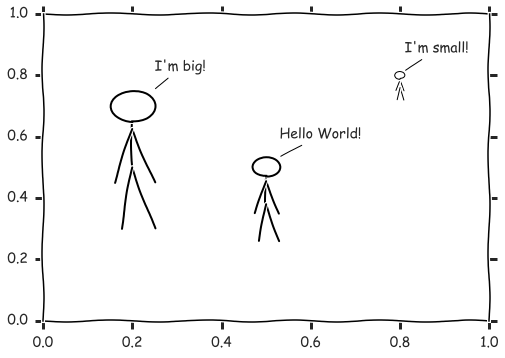

In [4]:
fig, ax = plt.subplots()
draw_stick_figure(ax, quote='Hello World!')
draw_stick_figure(ax, x=.8, y=.8, radius=.01, quote="I'm small!", lw=1)
draw_stick_figure(ax, x=.2, y=.7, radius=.05, quote="I'm big!", lw=2)

In [5]:
# two columns: date (year), optimism
data = np.array([
    [2013, 0],
    [2013 + 3/12, 0],
    [2013 + 6/12, .2],
    [2013 + 9/12, .3],
    [2014, .5],
    [2014 + 3/12, .5],
    [2014 + 8/12, .6],
    [2014 + 10/12, -.9],
    [2015, -.6],
    [2015 + 3/12, -.3],
    [2015 + 6/12, .1],
    [2015 + 9/12, -1.3],
    [2016, -.6],
    [2016 + 3/12, -.3],
    [2016 + 6/12, .1],
    [2016 + 7/12, .2],
    [2017, .2],
    [2018, .2],
])
x = data[:, 0]
y = data[:, 1]

# smooth the data
tck = interpolate.splrep(x, y, s=0)
xnew = np.linspace(min(x), max(x), 300)
ynew = interpolate.splev(xnew, tck, der=0)

In [6]:
def plot_optimism(ax, upto=None):
    
    # setup axes
    sns.despine(ax=ax, offset=15)
    ax.set_ylim(-1.5, 1.5)
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['despair', '0', 'hope'])
    ax.set_xlim(2013 + 6/12, 2016 + 9/12)
    ax.set_xticks([2014, 2015, 2016])
    ax.set_xticklabels([2014, 2015, 2016])
    ax.set_ylabel('Optimism')
    ax.spines['bottom'].set_position('center')
    ax.set_title('An unofficial history of the Ag1000G project', fontsize=16)
    
    # plot GEM conference dates
    ax.axvline(2014 + 6/12, -1, 2, linestyle='--', color='k')
    ax.axvline(2016 + 6/12, -1, 2, linestyle='--', color='k')
    ax.annotate('GEM2014', xy=(2014+6/12, -1.5), xytext=(2014+6/12, -1.6), 
                xycoords='data', textcoords='data', ha='center', va='top')
    ax.annotate('GEM2016', xy=(2016+6/12, -1.5), xytext=(2016+6/12, -1.6), 
                xycoords='data', textcoords='data', ha='center', va='top')
    
    # plot optimism
    if upto:
        flt = xnew < upto
        x = xnew[flt]
        y = ynew[flt]
    else:
        x = xnew
        y = ynew
    ax.plot(x, y, zorder=20)
    

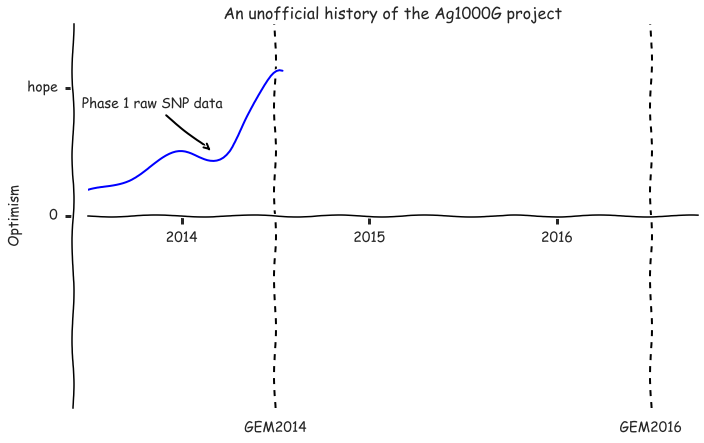

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_optimism(ax, upto=2014+6.5/12)
ax.annotate('Phase 1 raw SNP data', xy=(2014+2/12, .5), xytext=(10, 40), 
            xycoords='data', textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.set_yticks([0, 1])
ax.set_yticklabels(['0', 'hope'])
fig.tight_layout();

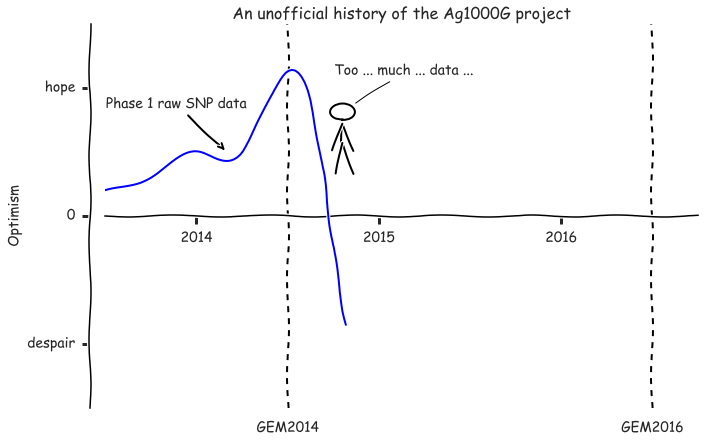

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_optimism(ax, upto=2014+10/12)
ax.annotate('Phase 1 raw SNP data', xy=(2014+2/12, .5), xytext=(20, 40), 
            xycoords='data', textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
draw_stick_figure(ax, x=.4, y=.77, quote='Too ... much ... data ... ', radius=.02, xytext=(-20, 30))
fig.tight_layout();

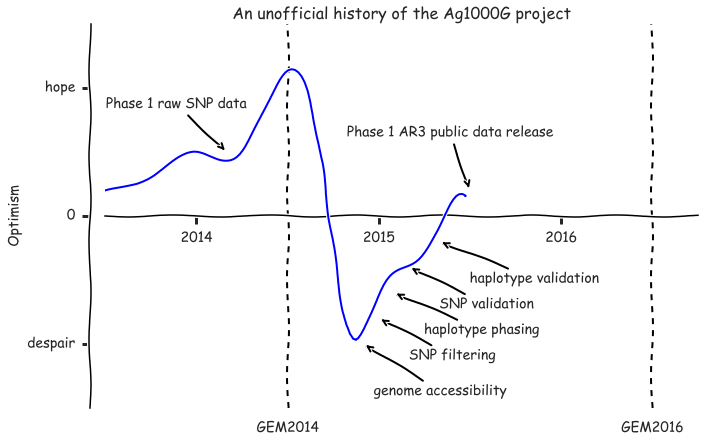

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_optimism(ax, upto=2015+5.8/12)
ax.annotate('Phase 1 raw SNP data', xy=(2014+2/12, .5), xytext=(20, 40), 
            xycoords='data', textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('genome accessibility', xy=(2014+11/12, -1), xytext=(10, -40), 
            xycoords='data', textcoords='offset points', ha='left', va='top', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('SNP filtering', xy=(2014+12/12, -.8), xytext=(30, -30), 
            xycoords='data', textcoords='offset points', ha='left', va='top', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('haplotype phasing', xy=(2015+1/12, -.6), xytext=(30, -30), 
            xycoords='data', textcoords='offset points', ha='left', va='top', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('SNP validation', xy=(2015+2/12, -.4), xytext=(30, -30), 
            xycoords='data', textcoords='offset points', ha='left', va='top', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('haplotype validation', xy=(2015+4/12, -.2), xytext=(30, -30), 
            xycoords='data', textcoords='offset points', ha='left', va='top', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('Phase 1 AR3 public data release', xy=(2015+6/12, .2), xytext=(-20, 50), 
            xycoords='data', textcoords='offset points', ha='center', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
fig.tight_layout();

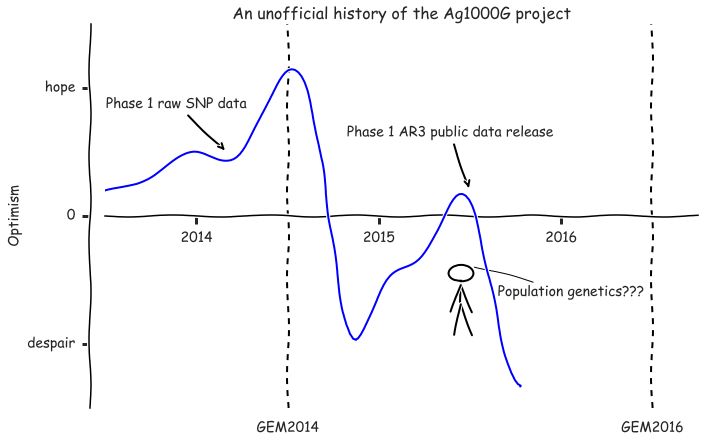

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_optimism(ax, upto=2015+9.5/12)
ax.annotate('Phase 1 raw SNP data', xy=(2014+2/12, .5), xytext=(20, 40), 
            xycoords='data', textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('Phase 1 AR3 public data release', xy=(2015+6/12, .2), xytext=(-20, 50), 
            xycoords='data', textcoords='offset points', ha='center', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
draw_stick_figure(ax, x=.6, y=.35, quote='Population genetics???', radius=.02, xytext=(25, -30))

fig.tight_layout();

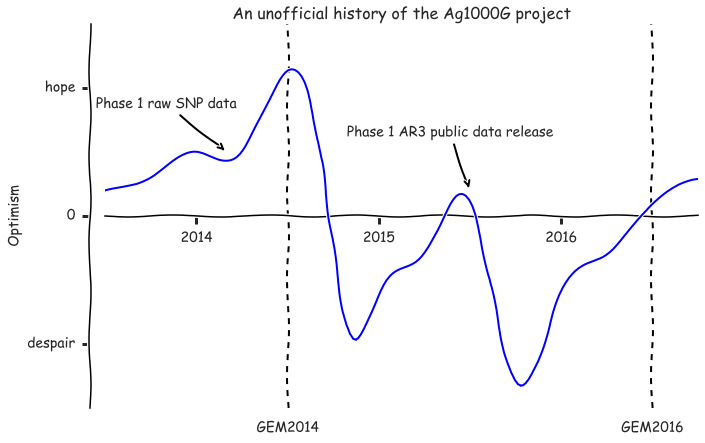

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_optimism(ax)
ax.annotate('Phase 1 raw SNP data', xy=(2014+2/12, .5), xytext=(10, 40), 
            xycoords='data', textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('Phase 1 AR3 public data release', xy=(2015+6/12, .2), xytext=(-20, 50), 
            xycoords='data', textcoords='offset points', ha='center', va='bottom', 
            arrowprops=dict(arrowstyle='->', lw=2))
fig.tight_layout();